In [1]:
import pandas as pd
from  datetime import datetime, timedelta
import matplotlib.pyplot as plt
import gc
import numpy as np

In [2]:
calendar = pd.read_csv(r"C:\Users\Xiang Fu\Desktop\Kaggle\m5-forecasting-accuracy/calendar_2.csv")
calendar["date"] = pd.to_datetime(calendar["date"])
calendar.head(10)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,CA,TX,WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,4,4,4
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,4,4,4
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,2,2,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,2,0,2
5,2011-02-03,11101,Thursday,6,2,2011,d_6,NaN,NaN,2,2,2
6,2011-02-04,11101,Friday,7,2,2011,d_7,NaN,NaN,2,0,0
7,2011-02-05,11102,Saturday,1,2,2011,d_8,NaN,NaN,6,6,6
8,2011-02-06,11102,Sunday,2,2,2011,d_9,SuperBowl,Sporting,5,5,5
9,2011-02-07,11102,Monday,3,2,2011,d_10,NaN,NaN,2,2,0


In [3]:
# Read csv file
pricetypes = {'store_id': 'category',
             'item_id': 'category',
             'wm_yr_wk': 'int16',
             'sell_price': 'float32',
             'sell_diff': 'float32',
             'ratio': 'float32'}

prices_tx = pd.read_csv(r"C:\Users\Xiang Fu\Desktop\Kaggle\m5-forecasting-accuracy/sell_price_tx.csv", dtype = pricetypes)

In [4]:
prices_tx.head()

,store_id,item_id,wm_yr_wk,sell_price,sell_diff,ratio,train_id
0,TX_1,HOBBIES_1_001,11325,9.58,NaN,1.00,1437
1,TX_1,HOBBIES_1_001,11326,8.26,-1.32,0.86,1437
2,TX_1,HOBBIES_1_001,11327,8.26,0.00,0.86,1437
3,TX_1,HOBBIES_1_001,11328,8.26,0.00,0.86,1437
4,TX_1,HOBBIES_1_001,11329,8.26,0.00,0.86,1437


In [5]:
prices_tx.tail()

,store_id,item_id,wm_yr_wk,sell_price,sell_diff,ratio,train_id
2092117,TX_3,FOODS_3_827,11617,1.0,0.0,1.0,1436
2092118,TX_3,FOODS_3_827,11618,1.0,0.0,1.0,1436
2092119,TX_3,FOODS_3_827,11619,1.0,0.0,1.0,1436
2092120,TX_3,FOODS_3_827,11620,1.0,0.0,1.0,1436
2092121,TX_3,FOODS_3_827,11621,1.0,0.0,1.0,1436


In [6]:
firstDay = 1183
lastDay = 1913

# Use x sales days (columns) for training
numCols = [f"d_{day}" for day in range(firstDay, lastDay+1)]

# Define all categorical columns
catCols = ['id', 'item_id', 'dept_id','store_id', 'cat_id', 'state_id']

# Define the correct data types for "sales_train_validation.csv"
dtype = {numCol: "float32" for numCol in numCols} 
dtype.update({catCol: "category" for catCol in catCols if catCol != "id"})

[(k,v)  for k,v in dtype.items()][:10]

[('d_1183', 'float32'),
 ('d_1184', 'float32'),
 ('d_1185', 'float32'),
 ('d_1186', 'float32'),
 ('d_1187', 'float32'),
 ('d_1188', 'float32'),
 ('d_1189', 'float32'),
 ('d_1190', 'float32'),
 ('d_1191', 'float32'),
 ('d_1192', 'float32')]

In [7]:
# Read csv file
ds = pd.read_csv(r"C:\Users\Xiang Fu\Desktop\Kaggle\m5-forecasting-accuracy/sales_train_validation.csv", 
                 usecols = catCols + numCols, dtype = dtype)

ds.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1183,d_1184,d_1185,d_1186,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0.0,0.0,1.0,0.0,...,1.0,3.0,0.0,1.0,1.0,1.0,3.0,0.0,1.0,1.0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0.0,0.0,0.0,0.0,...,2.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,1.0,1.0,4.0,1.0,...,1.0,0.0,5.0,4.0,1.0,0.0,1.0,3.0,7.0,2.0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,1.0,0.0,1.0,2.0,...,2.0,1.0,1.0,0.0,1.0,1.0,2.0,2.0,2.0,4.0


In [8]:
TX_validation = ds[(ds['state_id'] == 'TX')].copy()

In [9]:
TX_validation.shape

(9147, 737)

In [10]:
# Transform categorical features into integers
trLast = 1913

def create_ds(data,prices):
    for day in range(trLast + 1, trLast+ 56 +1):
        data[f"d_{day}"] = np.nan
        
    data = pd.melt(data,
                 id_vars = catCols,
                 value_vars = [col for col in data.columns if col.startswith("d_")],
                 var_name = "d",
                 value_name = "sales")

# # Merge data with "calendar" and "prices" dataframe
    data = data.merge(calendar, on = "d", copy = False)
    data = data.merge(prices, on = ["store_id", "item_id","wm_yr_wk",], copy = False)
    return data

In [11]:
TX_validation = create_ds(TX_validation,prices_tx)
TX_validation.tail()

,id,item_id,dept_id,store_id,cat_id,state_id,d,sales,date,wm_yr_wk,...,year,event_name_1,event_type_1,CA,TX,WI,sell_price,sell_diff,ratio,train_id
7079668,FOODS_3_825_TX_3_validation,FOODS_3_825,FOODS_3,TX_3,FOODS,TX,d_1969,NaN,2016-06-19,11621,...,2016,NBAFinalsEnd,Sporting,7,7,7,3.98,0.0,0.91,1434
7079669,FOODS_3_826_TX_3_validation,FOODS_3_826,FOODS_3,TX_3,FOODS,TX,d_1968,NaN,2016-06-18,11621,...,2016,NaN,NaN,4,4,4,1.28,0.0,1.00,1435
7079670,FOODS_3_826_TX_3_validation,FOODS_3_826,FOODS_3,TX_3,FOODS,TX,d_1969,NaN,2016-06-19,11621,...,2016,NBAFinalsEnd,Sporting,7,7,7,1.28,0.0,1.00,1435
7079671,FOODS_3_827_TX_3_validation,FOODS_3_827,FOODS_3,TX_3,FOODS,TX,d_1968,NaN,2016-06-18,11621,...,2016,NaN,NaN,4,4,4,1.00,0.0,1.00,1436
7079672,FOODS_3_827_TX_3_validation,FOODS_3_827,FOODS_3,TX_3,FOODS,TX,d_1969,NaN,2016-06-19,11621,...,2016,NBAFinalsEnd,Sporting,7,7,7,1.00,0.0,1.00,1436


In [12]:
TX_va_traindata_1 = TX_validation.copy()
TX_va_traindata_1 = TX_va_traindata_1.drop('event_name_1', axis = 1)
TX_va_traindata_1 = TX_va_traindata_1.drop('event_type_1', axis = 1)

In [13]:
from sklearn import preprocessing

TX_item_encoder = preprocessing.LabelEncoder()
TX_item_fit = TX_item_encoder.fit(TX_va_traindata_1['item_id'].unique())
TX_va_traindata_1.iloc[:,1] = TX_item_fit.transform(TX_va_traindata_1.iloc[:,1])

TX_dept_encoder = preprocessing.LabelEncoder()
TX_dept_fit = TX_dept_encoder.fit(TX_va_traindata_1['dept_id'].unique())
TX_va_traindata_1.iloc[:,2] = TX_dept_fit.transform(TX_va_traindata_1.iloc[:,2])

TX_store_encoder = preprocessing.LabelEncoder()
TX_store_fit = TX_store_encoder.fit(TX_va_traindata_1['store_id'].unique())
TX_va_traindata_1.iloc[:,3] = TX_store_fit.transform(TX_va_traindata_1.iloc[:,3])

TX_cat_encoder = preprocessing.LabelEncoder()
TX_cat_fit = TX_cat_encoder.fit(TX_va_traindata_1['cat_id'].unique())
TX_va_traindata_1.iloc[:,4] = TX_cat_fit.transform(TX_va_traindata_1.iloc[:,4])

TX_va_traindata_1

,id,item_id,dept_id,store_id,cat_id,state_id,d,sales,date,wm_yr_wk,...,wday,month,year,CA,TX,WI,sell_price,sell_diff,ratio,train_id
0,HOBBIES_1_001_TX_1_validation,1437,3,0,1,TX,d_1183,1.0,2014-04-25,11412,...,7,4,2014,0,0,0,8.26,0.0,0.86,1437
1,HOBBIES_1_002_TX_1_validation,1438,3,0,1,TX,d_1183,0.0,2014-04-25,11412,...,7,4,2014,0,0,0,3.97,0.0,1.00,1438
2,HOBBIES_1_003_TX_1_validation,1439,3,0,1,TX,d_1183,0.0,2014-04-25,11412,...,7,4,2014,0,0,0,2.97,0.0,1.00,1439
3,HOBBIES_1_004_TX_1_validation,1440,3,0,1,TX,d_1183,1.0,2014-04-25,11412,...,7,4,2014,0,0,0,4.64,0.0,1.00,1440
4,HOBBIES_1_005_TX_1_validation,1441,3,0,1,TX,d_1183,0.0,2014-04-25,11412,...,7,4,2014,0,0,0,2.73,0.0,1.00,1441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7079668,FOODS_3_825_TX_3_validation,1434,2,2,0,TX,d_1969,NaN,2016-06-19,11621,...,2,6,2016,7,7,7,3.98,0.0,0.91,1434
7079669,FOODS_3_826_TX_3_validation,1435,2,2,0,TX,d_1968,NaN,2016-06-18,11621,...,1,6,2016,4,4,4,1.28,0.0,1.00,1435
7079670,FOODS_3_826_TX_3_validation,1435,2,2,0,TX,d_1969,NaN,2016-06-19,11621,...,2,6,2016,7,7,7,1.28,0.0,1.00,1435
7079671,FOODS_3_827_TX_3_validation,1436,2,2,0,TX,d_1968,NaN,2016-06-18,11621,...,1,6,2016,4,4,4,1.00,0.0,1.00,1436


In [14]:
def daylag(data):
    dayLags = [7, 28]
    lagSalesCols = [f"lag_{dayLag}" for dayLag in dayLags]
    for dayLag, lagSalesCol in zip(dayLags, lagSalesCols):
        data[lagSalesCol] = data[["id","sales"]].groupby("id")["sales"].shift(dayLag)
    windows = [7, 28]
    for window in windows:
        for dayLag, lagSalesCol in zip(dayLags, lagSalesCols):
            data[f"rmean_{dayLag}_{window}"] = data[["id", lagSalesCol]].groupby("id")[lagSalesCol].transform(lambda x: x.rolling(window).mean())
    return data

In [15]:
TX_va_traindata_1 = daylag(TX_va_traindata_1)
TX_va_traindata_1.head()

,id,item_id,dept_id,store_id,cat_id,state_id,d,sales,date,wm_yr_wk,...,sell_price,sell_diff,ratio,train_id,lag_7,lag_28,rmean_7_7,rmean_28_7,rmean_7_28,rmean_28_28
0,HOBBIES_1_001_TX_1_validation,1437,3,0,1,TX,d_1183,1.0,2014-04-25,11412,...,8.26,0.0,0.86,1437,NaN,NaN,NaN,NaN,NaN,NaN
1,HOBBIES_1_002_TX_1_validation,1438,3,0,1,TX,d_1183,0.0,2014-04-25,11412,...,3.97,0.0,1.00,1438,NaN,NaN,NaN,NaN,NaN,NaN
2,HOBBIES_1_003_TX_1_validation,1439,3,0,1,TX,d_1183,0.0,2014-04-25,11412,...,2.97,0.0,1.00,1439,NaN,NaN,NaN,NaN,NaN,NaN
3,HOBBIES_1_004_TX_1_validation,1440,3,0,1,TX,d_1183,1.0,2014-04-25,11412,...,4.64,0.0,1.00,1440,NaN,NaN,NaN,NaN,NaN,NaN
4,HOBBIES_1_005_TX_1_validation,1441,3,0,1,TX,d_1183,0.0,2014-04-25,11412,...,2.73,0.0,1.00,1441,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
TX_va_traindata_1.tail()

,id,item_id,dept_id,store_id,cat_id,state_id,d,sales,date,wm_yr_wk,...,sell_price,sell_diff,ratio,train_id,lag_7,lag_28,rmean_7_7,rmean_28_7,rmean_7_28,rmean_28_28
7079668,FOODS_3_825_TX_3_validation,1434,2,2,0,TX,d_1969,NaN,2016-06-19,11621,...,3.98,0.0,0.91,1434,NaN,NaN,NaN,NaN,NaN,NaN
7079669,FOODS_3_826_TX_3_validation,1435,2,2,0,TX,d_1968,NaN,2016-06-18,11621,...,1.28,0.0,1.00,1435,NaN,NaN,NaN,NaN,NaN,NaN
7079670,FOODS_3_826_TX_3_validation,1435,2,2,0,TX,d_1969,NaN,2016-06-19,11621,...,1.28,0.0,1.00,1435,NaN,NaN,NaN,NaN,NaN,NaN
7079671,FOODS_3_827_TX_3_validation,1436,2,2,0,TX,d_1968,NaN,2016-06-18,11621,...,1.00,0.0,1.00,1436,NaN,NaN,NaN,NaN,NaN,NaN
7079672,FOODS_3_827_TX_3_validation,1436,2,2,0,TX,d_1969,NaN,2016-06-19,11621,...,1.00,0.0,1.00,1436,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
TX_va_traindata_1.columns

Index(['id', 'item_id', 'dept_id', 'store_id', 'cat_id', 'state_id', 'd',
       'sales', 'date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'CA',
       'TX', 'WI', 'sell_price', 'sell_diff', 'ratio', 'train_id', 'lag_7',
       'lag_28', 'rmean_7_7', 'rmean_28_7', 'rmean_7_28', 'rmean_28_28'],
      dtype='object')

In [18]:
# # Remove all rows with NaN value
TX_va_traindata_1.dropna( inplace = True)

# Define columns that need to be removed
unusedCols = ["id", 'state_id', 'd', 'sales', 'date', 'wm_yr_wk', 'train_id',
              'weekday', 'year','event_name_1', 'event_type_1','CA','WI','sell_price']
trainCols = TX_va_traindata_1.columns[~TX_va_traindata_1.columns.isin(unusedCols)]

In [19]:
TX_X_train = TX_va_traindata_1[trainCols]
TX_y_train = TX_va_traindata_1[["sales"]]

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(TX_X_train, TX_y_train, test_size=0.2, random_state=6)

In [22]:
import xgboost as xgb
from xgboost import XGBRegressor
xgb_r = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb_r.fit(X_train,y_train)

[19:16:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:16:24] WARNING: src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.08, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.75, verbosity=1)

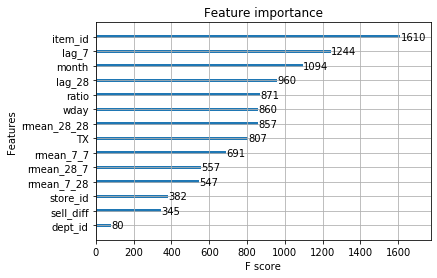

<Figure size 432x288 with 0 Axes>

In [23]:
xgb.plot_importance(xgb_r)
plt.figure(figsize = (6, 4))
plt.show()

In [24]:
predictions = xgb_r.predict(X_test)

In [25]:
from sklearn.metrics import explained_variance_score
print(explained_variance_score(y_test,predictions))

0.6852728893941


In [26]:
import lightgbm as lgb
np.random.seed(777)

# Define categorical features
catFeats = ['item_id', 'lag_7', 'month', 'lag_28', 'ratio', 'wday', 'rmean_28_28',
            'TX', 'rmean_7_7', 'rmean_28_7', 'rmean_7_28', 
            'store_id', 'sell_diff', 'dept_id']

validInds = np.random.choice(TX_X_train.index.values, 1_500_000, replace = False)
trainInds = np.setdiff1d(TX_X_train.index.values, validInds)

trainData = lgb.Dataset(TX_X_train.loc[trainInds], label = TX_y_train.loc[trainInds], 
                        categorical_feature = catFeats,free_raw_data = False)
validData = lgb.Dataset(TX_X_train.loc[validInds], label = TX_y_train.loc[validInds],
                        categorical_feature = catFeats,free_raw_data = False)

In [27]:
import gc
gc.collect()

4711

In [28]:
params = {
          "objective" : "poisson",
          "metric" :"rmse",
          "force_row_wise" : True,
          "learning_rate" : 0.075,
          "sub_row" : 0.75,
          "bagging_freq" : 1,
          "lambda_l2" : 0.1,
          "metric": ["rmse"],
          'verbosity': 1,
          'num_iterations' : 1200,
          'num_leaves': 128,
          "min_data_in_leaf": 100,
         }

In [29]:
m_lgb = lgb.train(params, trainData, valid_sets = validData, verbose_eval = 100) 

C:\Users\Xiang Fu\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Xiang Fu\anaconda3\lib\site-packages\lightgbm\basic.py:1243: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[100]	valid_0's rmse: 2.02108
[200]	valid_0's rmse: 1.9983
[300]	valid_0's rmse: 1.98898
[400]	valid_0's rmse: 1.98433
[500]	valid_0's rmse: 1.9815
[600]	valid_0's rmse: 1.98025
[700]	valid_0's rmse: 1.9788
[800]	valid_0's rmse: 1.97862
[900]	valid_0's rmse: 1.97828
[1000]	valid_0's rmse: 1.97775
[1100]	valid_0's rmse: 1.97754
[1200]	valid_0's rmse: 1.97705


In [30]:
# Save the model
m_lgb.save_model("model_TX.lgb")

In [31]:
# Last day used for training
trLast = 1913
# Maximum lag day
maxLags = 57

def create_features(ds):          
    dayLags = [7, 28]
    lagSalesCols = [f"lag_{dayLag}" for dayLag in dayLags]
    for dayLag, lagSalesCol in zip(dayLags, lagSalesCols):
        ds[lagSalesCol] = ds[["id","sales"]].groupby("id")["sales"].shift(dayLag)

    windows = [7, 28]
    for window in windows:
        for dayLag, lagSalesCol in zip(dayLags, lagSalesCols):
            ds[f"rmean_{dayLag}_{window}"] = ds[["id", lagSalesCol]].groupby("id")[lagSalesCol].transform(lambda x: x.rolling(window).mean())
    ds_item_encoder = preprocessing.LabelEncoder()
    ds_item_fit = ds_item_encoder.fit(ds['item_id'].unique())
    ds.iloc[:,1] = ds_item_fit.transform(ds.iloc[:,1])

    ds_dept_encoder = preprocessing.LabelEncoder()
    ds_dept_fit = ds_dept_encoder.fit(ds['dept_id'].unique())
    ds.iloc[:,2] = ds_dept_fit.transform(ds.iloc[:,2])

    ds_store_encoder = preprocessing.LabelEncoder()
    ds_store_fit = ds_store_encoder.fit(ds['store_id'].unique())
    ds.iloc[:,3] = ds_store_fit.transform(ds.iloc[:,3])

    ds_cat_encoder = preprocessing.LabelEncoder()
    ds_cat_fit = ds_cat_encoder.fit(ds['cat_id'].unique())
    ds.iloc[:,4] = ds_cat_fit.transform(ds.iloc[:,4])    

In [32]:
fday = datetime(2016,4, 25) 
alphas = [1.028, 1.023, 1.018]
weights = [1/len(alphas)] * len(alphas)
sub = 0.

for icount, (alpha, weight) in enumerate(zip(alphas, weights)):

    te = TX_validation.copy()
    cols = [f"F{i}" for i in range(1,57)]

    for tdelta in range(0, 56):
        day = fday + timedelta(days=tdelta)
        print(tdelta, day)
        tst = te[(te['date'] >= day - timedelta(days=maxLags)) & (te['date'] <= day)].copy()
        create_features(tst)
        tst = tst.loc[tst['date'] == day , trainCols]
        te.loc[te['date'] == day, "sales"] = alpha * m_lgb.predict(tst) # magic multiplier by kyakovlev

    te_sub = te.loc[te['date'] >= fday, ["id", "sales"]].copy()
    te_sub["F"] = [f"F{rank}" for rank in te_sub.groupby("id")["id"].cumcount()+1]
    te_sub = te_sub.set_index(["id", "F" ]).unstack()["sales"][cols].reset_index()
    te_sub.fillna(0., inplace = True)
    te_sub.sort_values("id", inplace = True)
    te_sub.reset_index(drop=True, inplace = True)
    te_sub.to_csv(f"submission_{icount}.csv",index=False)
    if icount == 0 :
        sub = te_sub
        sub[cols] *= weight
    else:
        sub[cols] += te_sub[cols]*weight
    print(icount, alpha, weight)


0 2016-04-25 00:00:00
1 2016-04-26 00:00:00
2 2016-04-27 00:00:00
3 2016-04-28 00:00:00
4 2016-04-29 00:00:00
5 2016-04-30 00:00:00
6 2016-05-01 00:00:00
7 2016-05-02 00:00:00
8 2016-05-03 00:00:00
9 2016-05-04 00:00:00
10 2016-05-05 00:00:00
11 2016-05-06 00:00:00
12 2016-05-07 00:00:00
13 2016-05-08 00:00:00
14 2016-05-09 00:00:00
15 2016-05-10 00:00:00
16 2016-05-11 00:00:00
17 2016-05-12 00:00:00
18 2016-05-13 00:00:00
19 2016-05-14 00:00:00
20 2016-05-15 00:00:00
21 2016-05-16 00:00:00
22 2016-05-17 00:00:00
23 2016-05-18 00:00:00
24 2016-05-19 00:00:00
25 2016-05-20 00:00:00
26 2016-05-21 00:00:00
27 2016-05-22 00:00:00
28 2016-05-23 00:00:00
29 2016-05-24 00:00:00
30 2016-05-25 00:00:00
31 2016-05-26 00:00:00
32 2016-05-27 00:00:00
33 2016-05-28 00:00:00
34 2016-05-29 00:00:00
35 2016-05-30 00:00:00
36 2016-05-31 00:00:00
37 2016-06-01 00:00:00
38 2016-06-02 00:00:00
39 2016-06-03 00:00:00
40 2016-06-04 00:00:00
41 2016-06-05 00:00:00
42 2016-06-06 00:00:00
43 2016-06-07 00:00:0

In [33]:
sub2 = sub.copy()
sub2["id"] = sub2["id"].str.replace("validation$", "evaluation")
sub = pd.concat([sub, sub2], axis=0, sort=False)
sub.head(10)

F,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F47,F48,F49,F50,F51,F52,F53,F54,F55,F56
0,FOODS_1_001_TX_1_validation,0.402019,0.438785,0.438939,0.458027,0.462353,0.560629,0.556113,0.448208,0.490709,...,0.457452,0.607585,0.504931,0.549618,0.481742,0.588705,0.477405,0.457452,0.669515,0.436000
1,FOODS_1_001_TX_2_validation,0.339553,0.354685,0.351064,0.391390,0.388589,0.574172,0.503919,0.372374,0.456255,...,0.355383,0.529195,0.449415,0.438509,0.359095,0.451628,0.361828,0.355383,0.545275,0.337861
2,FOODS_1_001_TX_3_validation,0.391185,0.348905,0.350743,0.597818,0.389980,0.419412,0.402353,0.351206,0.399432,...,0.352161,0.503835,0.426122,0.424329,0.359175,0.449582,0.363542,0.352161,0.515177,0.332446
3,FOODS_1_002_TX_1_validation,0.129347,0.126855,0.132582,0.139918,0.147799,0.170052,0.191682,0.123803,0.155545,...,0.129218,0.185613,0.175177,0.153243,0.119010,0.153977,0.128621,0.129218,0.156173,0.137509
4,FOODS_1_002_TX_2_validation,0.182681,0.161470,0.167441,0.179344,0.208121,0.246002,0.241763,0.225148,0.197862,...,0.173460,0.236364,0.218261,0.212540,0.147304,0.192990,0.158676,0.173460,0.214434,0.179694
5,FOODS_1_002_TX_3_validation,0.248176,0.250094,0.211464,0.196180,0.328851,0.243569,0.236003,0.176566,0.212252,...,0.179210,0.230355,0.212712,0.210664,0.159497,0.205359,0.172887,0.179210,0.209790,0.179946
6,FOODS_1_003_TX_1_validation,0.308395,0.191031,0.197648,0.206827,0.207156,0.208239,0.368155,0.214946,0.251640,...,0.226619,0.273462,0.294416,0.264401,0.221395,0.259479,0.228604,0.226619,0.247715,0.247142
7,FOODS_1_003_TX_2_validation,0.210128,0.261975,0.401446,0.419243,0.352891,0.400958,0.537900,0.377787,0.396293,...,0.242807,0.291779,0.316582,0.284852,0.217913,0.254106,0.225592,0.242807,0.260734,0.263927
8,FOODS_1_003_TX_3_validation,0.138967,0.137035,0.141626,0.148392,0.147620,0.141686,0.183695,0.152657,0.178503,...,0.161356,0.188961,0.204499,0.187570,0.158654,0.184494,0.163880,0.161356,0.164501,0.168739
9,FOODS_1_004_TX_1_validation,0.150320,0.131583,0.137974,0.131621,0.155227,0.191569,0.269381,0.154764,0.178584,...,0.191156,0.281636,0.282158,0.229613,0.167591,0.202457,0.168282,0.191156,0.294932,0.232519


In [34]:
sub.tail(10)

F,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F47,F48,F49,F50,F51,F52,F53,F54,F55,F56
9137,HOUSEHOLD_2_513_TX_3_evaluation,0.665916,0.427081,0.471960,0.440986,0.521619,0.566398,0.644557,0.421476,0.466017,...,0.380657,0.431340,0.430306,0.421390,0.351283,0.390679,0.349501,0.380657,0.449689,0.384695
9138,HOUSEHOLD_2_514_TX_1_evaluation,0.114333,0.135108,0.133632,0.169768,0.156759,0.132352,0.207371,0.106858,0.115627,...,0.106646,0.124191,0.115565,0.098909,0.128860,0.117495,0.122693,0.106646,0.129340,0.115268
9139,HOUSEHOLD_2_514_TX_2_evaluation,0.102500,0.124874,0.123509,0.118943,0.105150,0.168023,0.117190,0.095865,0.108456,...,0.091410,0.108192,0.101897,0.085506,0.113893,0.104389,0.108848,0.091410,0.110827,0.096564
9140,HOUSEHOLD_2_514_TX_3_evaluation,0.098615,0.116686,0.115410,0.110966,0.101164,0.107213,0.106434,0.091885,0.099954,...,0.088384,0.098413,0.092450,0.081849,0.106826,0.096932,0.101931,0.088384,0.100573,0.089771
9141,HOUSEHOLD_2_515_TX_1_evaluation,0.079575,0.072693,0.071533,0.069364,0.078825,0.068335,0.109474,0.090526,0.077315,...,0.107733,0.130784,0.134315,0.107958,0.120831,0.114034,0.118795,0.107733,0.106171,0.093355
9142,HOUSEHOLD_2_515_TX_2_evaluation,0.102613,0.084294,0.085280,0.082243,0.101646,0.095220,0.158023,0.112915,0.091544,...,0.134500,0.191881,0.197403,0.146808,0.136613,0.135698,0.131956,0.134500,0.154334,0.124031
9143,HOUSEHOLD_2_515_TX_3_evaluation,0.069225,0.063317,0.064240,0.061952,0.070700,0.062025,0.102813,0.077648,0.066950,...,0.093950,0.120537,0.123689,0.094030,0.102227,0.100294,0.103162,0.093950,0.096768,0.082009
9144,HOUSEHOLD_2_516_TX_1_evaluation,0.140905,0.151429,0.154060,0.156780,0.152861,0.169879,0.202473,0.144914,0.146305,...,0.154831,0.212949,0.206120,0.136628,0.149509,0.148595,0.157370,0.154831,0.192335,0.173688
9145,HOUSEHOLD_2_516_TX_2_evaluation,0.246728,0.242084,0.227018,0.287610,0.267663,0.296773,0.311527,0.251389,0.264781,...,0.269903,0.340813,0.321402,0.236639,0.239996,0.236429,0.254053,0.269903,0.336428,0.287696
9146,HOUSEHOLD_2_516_TX_3_evaluation,0.198075,0.240971,0.245158,0.214372,0.214882,0.233261,0.247389,0.201662,0.230279,...,0.207220,0.259597,0.244811,0.182585,0.194470,0.191416,0.204309,0.207220,0.248564,0.214967


In [35]:
sub.id.nunique(), sub["id"].str.contains("validation$").sum()

(18294, 9147)

In [36]:
sub.shape

(18294, 57)

In [37]:
sub22 = pd.read_csv(r'C:\Users\Xiang Fu\Desktop\Kaggle\m5-forecasting-accuracy/sample_submission.csv')

In [38]:
sub22.shape
# 60980/2 = 30490

(60980, 29)

In [39]:
sub_tx_va = sub22.iloc[12196:21343,:]
sub_tx_va

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
12196,HOBBIES_1_001_TX_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12197,HOBBIES_1_002_TX_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12198,HOBBIES_1_003_TX_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12199,HOBBIES_1_004_TX_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12200,HOBBIES_1_005_TX_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21338,FOODS_3_823_TX_3_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21339,FOODS_3_824_TX_3_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21340,FOODS_3_825_TX_3_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21341,FOODS_3_826_TX_3_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
sub_tx_va = sub_tx_va.merge(sub, on = ["id"], copy = False)

In [41]:
sub_tx_va.drop(sub_tx_va.columns[1:29], axis = 1, inplace = True)

In [42]:
sub_tx_va

,id,F1_y,F2_y,F3_y,F4_y,F5_y,F6_y,F7_y,F8_y,F9_y,...,F47,F48,F49,F50,F51,F52,F53,F54,F55,F56
0,HOBBIES_1_001_TX_1_validation,0.325172,0.286664,0.311036,0.296113,0.270915,0.311592,0.552202,0.323410,0.255907,...,0.265556,0.310287,0.330502,0.279255,0.235033,0.252006,0.245503,0.265556,0.298390,0.313369
1,HOBBIES_1_002_TX_1_validation,0.099000,0.105938,0.108321,0.106948,0.110059,0.138316,0.182589,0.101509,0.114072,...,0.118653,0.182797,0.183612,0.112202,0.118236,0.123161,0.120361,0.118653,0.156549,0.140202
2,HOBBIES_1_003_TX_1_validation,0.115604,0.116563,0.122072,0.123050,0.135588,0.176904,0.192934,0.172538,0.207187,...,0.142199,0.199503,0.209416,0.158602,0.131797,0.166200,0.137004,0.142199,0.179142,0.193221
3,HOBBIES_1_004_TX_1_validation,0.948722,0.919782,0.800302,0.481395,0.566218,0.969198,1.010957,0.597250,0.426672,...,0.411403,0.622394,0.606868,0.418672,0.316179,0.315675,0.319426,0.411403,0.631399,0.568823
4,HOBBIES_1_005_TX_1_validation,0.423746,0.428010,0.628124,0.655698,0.658755,0.833071,0.870297,0.585465,0.619102,...,0.488764,0.816951,0.598220,0.385159,0.373981,0.372768,0.420544,0.436283,0.535721,0.443326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9142,FOODS_3_823_TX_3_validation,0.353003,0.206501,0.208714,0.202346,0.340868,0.231087,0.462604,0.185484,0.232267,...,0.169973,0.245702,0.254764,0.234163,0.167185,0.210112,0.166149,0.169973,0.229011,0.182758
9143,FOODS_3_824_TX_3_validation,0.115610,0.118712,0.117080,0.114219,0.112302,0.244066,0.149328,0.126820,0.132444,...,0.137594,0.151740,0.167373,0.167629,0.142344,0.147914,0.137684,0.137594,0.130733,0.119451
9144,FOODS_3_825_TX_3_validation,0.885920,0.996317,0.798160,0.842051,0.799031,1.052040,1.638291,1.149349,1.276626,...,1.102917,1.519521,1.665368,1.733902,1.000962,1.153025,1.010326,1.085774,1.221319,1.170254
9145,FOODS_3_826_TX_3_validation,1.326388,1.371456,1.256237,1.127575,1.149592,1.168372,1.187574,0.972207,1.250886,...,1.143692,1.221875,1.289429,1.510172,1.109678,1.166390,1.086047,1.143692,1.279559,1.182149


In [43]:
sub_tx_va.shape

(9147, 57)

In [45]:
sub_tx_va.drop(sub_tx_va.columns[29:], axis = 1, inplace = True)

In [46]:
sub_tx_va

,id,F1_y,F2_y,F3_y,F4_y,F5_y,F6_y,F7_y,F8_y,F9_y,...,F19_y,F20_y,F21_y,F22_y,F23_y,F24_y,F25_y,F26_y,F27_y,F28_y
0,HOBBIES_1_001_TX_1_validation,0.325172,0.286664,0.311036,0.296113,0.270915,0.311592,0.552202,0.323410,0.255907,...,0.274670,0.314963,0.326811,0.259135,0.310055,0.259191,0.319461,0.275212,0.314963,0.436108
1,HOBBIES_1_002_TX_1_validation,0.099000,0.105938,0.108321,0.106948,0.110059,0.138316,0.182589,0.101509,0.114072,...,0.115587,0.150748,0.173115,0.101509,0.108071,0.110709,0.108261,0.111037,0.150748,0.137494
2,HOBBIES_1_003_TX_1_validation,0.115604,0.116563,0.122072,0.123050,0.135588,0.176904,0.192934,0.172538,0.207187,...,0.153027,0.177628,0.192529,0.125800,0.126981,0.134138,0.123018,0.134905,0.177628,0.180359
3,HOBBIES_1_004_TX_1_validation,0.948722,0.919782,0.800302,0.481395,0.566218,0.969198,1.010957,0.597250,0.426672,...,0.375059,0.698698,0.794375,0.563424,0.432092,0.413477,0.304197,0.385089,0.824089,0.849612
4,HOBBIES_1_005_TX_1_validation,0.423746,0.428010,0.628124,0.655698,0.658755,0.833071,0.870297,0.585465,0.619102,...,0.548169,1.005307,0.913015,0.395092,0.569079,0.663447,0.728415,0.563746,0.816938,0.698096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9142,FOODS_3_823_TX_3_validation,0.353003,0.206501,0.208714,0.202346,0.340868,0.231087,0.462604,0.185484,0.232267,...,0.294572,0.329259,0.260559,0.252354,0.188081,0.188673,0.184268,0.234796,0.251131,0.300013
9143,FOODS_3_824_TX_3_validation,0.115610,0.118712,0.117080,0.114219,0.112302,0.244066,0.149328,0.126820,0.132444,...,0.121047,0.120954,0.168638,0.126820,0.128900,0.127222,0.117112,0.118686,0.120954,0.135044
9144,FOODS_3_825_TX_3_validation,0.885920,0.996317,0.798160,0.842051,0.799031,1.052040,1.638291,1.149349,1.276626,...,1.162410,1.125345,1.489366,1.122483,1.003626,0.914191,0.929372,0.878740,1.264047,1.286092
9145,FOODS_3_826_TX_3_validation,1.326388,1.371456,1.256237,1.127575,1.149592,1.168372,1.187574,0.972207,1.250886,...,1.326081,1.253084,1.221051,1.217280,1.146220,1.330643,1.177451,1.168521,1.475131,1.356249


In [47]:
sub_tx_va.rename(columns = dict(zip(sub_tx_va.columns[1:], sub22.columns[1:])), inplace = True)

In [48]:
sub_tx_va

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_TX_1_validation,0.325172,0.286664,0.311036,0.296113,0.270915,0.311592,0.552202,0.323410,0.255907,...,0.274670,0.314963,0.326811,0.259135,0.310055,0.259191,0.319461,0.275212,0.314963,0.436108
1,HOBBIES_1_002_TX_1_validation,0.099000,0.105938,0.108321,0.106948,0.110059,0.138316,0.182589,0.101509,0.114072,...,0.115587,0.150748,0.173115,0.101509,0.108071,0.110709,0.108261,0.111037,0.150748,0.137494
2,HOBBIES_1_003_TX_1_validation,0.115604,0.116563,0.122072,0.123050,0.135588,0.176904,0.192934,0.172538,0.207187,...,0.153027,0.177628,0.192529,0.125800,0.126981,0.134138,0.123018,0.134905,0.177628,0.180359
3,HOBBIES_1_004_TX_1_validation,0.948722,0.919782,0.800302,0.481395,0.566218,0.969198,1.010957,0.597250,0.426672,...,0.375059,0.698698,0.794375,0.563424,0.432092,0.413477,0.304197,0.385089,0.824089,0.849612
4,HOBBIES_1_005_TX_1_validation,0.423746,0.428010,0.628124,0.655698,0.658755,0.833071,0.870297,0.585465,0.619102,...,0.548169,1.005307,0.913015,0.395092,0.569079,0.663447,0.728415,0.563746,0.816938,0.698096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9142,FOODS_3_823_TX_3_validation,0.353003,0.206501,0.208714,0.202346,0.340868,0.231087,0.462604,0.185484,0.232267,...,0.294572,0.329259,0.260559,0.252354,0.188081,0.188673,0.184268,0.234796,0.251131,0.300013
9143,FOODS_3_824_TX_3_validation,0.115610,0.118712,0.117080,0.114219,0.112302,0.244066,0.149328,0.126820,0.132444,...,0.121047,0.120954,0.168638,0.126820,0.128900,0.127222,0.117112,0.118686,0.120954,0.135044
9144,FOODS_3_825_TX_3_validation,0.885920,0.996317,0.798160,0.842051,0.799031,1.052040,1.638291,1.149349,1.276626,...,1.162410,1.125345,1.489366,1.122483,1.003626,0.914191,0.929372,0.878740,1.264047,1.286092
9145,FOODS_3_826_TX_3_validation,1.326388,1.371456,1.256237,1.127575,1.149592,1.168372,1.187574,0.972207,1.250886,...,1.326081,1.253084,1.221051,1.217280,1.146220,1.330643,1.177451,1.168521,1.475131,1.356249


In [49]:
sub_tx_va.to_csv("submission_tx_va.csv",index=False)

In [56]:
sub_tx_ev = sub22.iloc[42686:51833,:]
sub_tx_ev

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
42686,HOBBIES_1_001_TX_1_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42687,HOBBIES_1_002_TX_1_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42688,HOBBIES_1_003_TX_1_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42689,HOBBIES_1_004_TX_1_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42690,HOBBIES_1_005_TX_1_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51828,FOODS_3_823_TX_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51829,FOODS_3_824_TX_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51830,FOODS_3_825_TX_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51831,FOODS_3_826_TX_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
sub_tx_ev.shape

(9147, 29)

In [58]:
sub_tx_ev = sub_tx_ev.merge(sub, on = ["id"], copy = False)
sub_tx_ev

,id,F1_x,F2_x,F3_x,F4_x,F5_x,F6_x,F7_x,F8_x,F9_x,...,F47,F48,F49,F50,F51,F52,F53,F54,F55,F56
0,HOBBIES_1_001_TX_1_evaluation,0,0,0,0,0,0,0,0,0,...,0.265556,0.310287,0.330502,0.279255,0.235033,0.252006,0.245503,0.265556,0.298390,0.313369
1,HOBBIES_1_002_TX_1_evaluation,0,0,0,0,0,0,0,0,0,...,0.118653,0.182797,0.183612,0.112202,0.118236,0.123161,0.120361,0.118653,0.156549,0.140202
2,HOBBIES_1_003_TX_1_evaluation,0,0,0,0,0,0,0,0,0,...,0.142199,0.199503,0.209416,0.158602,0.131797,0.166200,0.137004,0.142199,0.179142,0.193221
3,HOBBIES_1_004_TX_1_evaluation,0,0,0,0,0,0,0,0,0,...,0.411403,0.622394,0.606868,0.418672,0.316179,0.315675,0.319426,0.411403,0.631399,0.568823
4,HOBBIES_1_005_TX_1_evaluation,0,0,0,0,0,0,0,0,0,...,0.488764,0.816951,0.598220,0.385159,0.373981,0.372768,0.420544,0.436283,0.535721,0.443326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9142,FOODS_3_823_TX_3_evaluation,0,0,0,0,0,0,0,0,0,...,0.169973,0.245702,0.254764,0.234163,0.167185,0.210112,0.166149,0.169973,0.229011,0.182758
9143,FOODS_3_824_TX_3_evaluation,0,0,0,0,0,0,0,0,0,...,0.137594,0.151740,0.167373,0.167629,0.142344,0.147914,0.137684,0.137594,0.130733,0.119451
9144,FOODS_3_825_TX_3_evaluation,0,0,0,0,0,0,0,0,0,...,1.102917,1.519521,1.665368,1.733902,1.000962,1.153025,1.010326,1.085774,1.221319,1.170254
9145,FOODS_3_826_TX_3_evaluation,0,0,0,0,0,0,0,0,0,...,1.143692,1.221875,1.289429,1.510172,1.109678,1.166390,1.086047,1.143692,1.279559,1.182149


In [59]:
sub_tx_ev.drop(sub_tx_ev.columns[1:29], axis = 1, inplace = True)
sub_tx_ev


,id,F1_y,F2_y,F3_y,F4_y,F5_y,F6_y,F7_y,F8_y,F9_y,...,F47,F48,F49,F50,F51,F52,F53,F54,F55,F56
0,HOBBIES_1_001_TX_1_evaluation,0.325172,0.286664,0.311036,0.296113,0.270915,0.311592,0.552202,0.323410,0.255907,...,0.265556,0.310287,0.330502,0.279255,0.235033,0.252006,0.245503,0.265556,0.298390,0.313369
1,HOBBIES_1_002_TX_1_evaluation,0.099000,0.105938,0.108321,0.106948,0.110059,0.138316,0.182589,0.101509,0.114072,...,0.118653,0.182797,0.183612,0.112202,0.118236,0.123161,0.120361,0.118653,0.156549,0.140202
2,HOBBIES_1_003_TX_1_evaluation,0.115604,0.116563,0.122072,0.123050,0.135588,0.176904,0.192934,0.172538,0.207187,...,0.142199,0.199503,0.209416,0.158602,0.131797,0.166200,0.137004,0.142199,0.179142,0.193221
3,HOBBIES_1_004_TX_1_evaluation,0.948722,0.919782,0.800302,0.481395,0.566218,0.969198,1.010957,0.597250,0.426672,...,0.411403,0.622394,0.606868,0.418672,0.316179,0.315675,0.319426,0.411403,0.631399,0.568823
4,HOBBIES_1_005_TX_1_evaluation,0.423746,0.428010,0.628124,0.655698,0.658755,0.833071,0.870297,0.585465,0.619102,...,0.488764,0.816951,0.598220,0.385159,0.373981,0.372768,0.420544,0.436283,0.535721,0.443326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9142,FOODS_3_823_TX_3_evaluation,0.353003,0.206501,0.208714,0.202346,0.340868,0.231087,0.462604,0.185484,0.232267,...,0.169973,0.245702,0.254764,0.234163,0.167185,0.210112,0.166149,0.169973,0.229011,0.182758
9143,FOODS_3_824_TX_3_evaluation,0.115610,0.118712,0.117080,0.114219,0.112302,0.244066,0.149328,0.126820,0.132444,...,0.137594,0.151740,0.167373,0.167629,0.142344,0.147914,0.137684,0.137594,0.130733,0.119451
9144,FOODS_3_825_TX_3_evaluation,0.885920,0.996317,0.798160,0.842051,0.799031,1.052040,1.638291,1.149349,1.276626,...,1.102917,1.519521,1.665368,1.733902,1.000962,1.153025,1.010326,1.085774,1.221319,1.170254
9145,FOODS_3_826_TX_3_evaluation,1.326388,1.371456,1.256237,1.127575,1.149592,1.168372,1.187574,0.972207,1.250886,...,1.143692,1.221875,1.289429,1.510172,1.109678,1.166390,1.086047,1.143692,1.279559,1.182149


In [60]:
sub_tx_ev.drop(sub_tx_ev.columns[1:29], axis = 1, inplace = True)
sub_tx_ev

,id,F29,F30,F31,F32,F33,F34,F35,F36,F37,...,F47,F48,F49,F50,F51,F52,F53,F54,F55,F56
0,HOBBIES_1_001_TX_1_evaluation,0.259135,0.252161,0.259191,0.259811,0.275212,0.314963,0.329849,0.272632,0.252161,...,0.265556,0.310287,0.330502,0.279255,0.235033,0.252006,0.245503,0.265556,0.298390,0.313369
1,HOBBIES_1_002_TX_1_evaluation,0.101509,0.108071,0.110709,0.108261,0.111037,0.150748,0.148774,0.105056,0.108071,...,0.118653,0.182797,0.183612,0.112202,0.118236,0.123161,0.120361,0.118653,0.156549,0.140202
2,HOBBIES_1_003_TX_1_evaluation,0.125800,0.126981,0.134138,0.123018,0.134905,0.177628,0.180359,0.128498,0.126981,...,0.142199,0.199503,0.209416,0.158602,0.131797,0.166200,0.137004,0.142199,0.179142,0.193221
3,HOBBIES_1_004_TX_1_evaluation,0.398443,0.301553,0.299351,0.326597,0.372769,0.666369,0.883790,0.417390,0.301553,...,0.411403,0.622394,0.606868,0.418672,0.316179,0.315675,0.319426,0.411403,0.631399,0.568823
4,HOBBIES_1_005_TX_1_evaluation,0.461109,0.461212,0.472036,0.526129,0.511432,0.578259,0.588922,0.523975,0.518106,...,0.488764,0.816951,0.598220,0.385159,0.373981,0.372768,0.420544,0.436283,0.535721,0.443326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9142,FOODS_3_823_TX_3_evaluation,0.185484,0.188081,0.188673,0.184268,0.183573,0.251131,0.241573,0.181598,0.188081,...,0.169973,0.245702,0.254764,0.234163,0.167185,0.210112,0.166149,0.169973,0.229011,0.182758
9143,FOODS_3_824_TX_3_evaluation,0.126820,0.128900,0.127222,0.117112,0.118686,0.120954,0.135044,0.112264,0.128900,...,0.137594,0.151740,0.167373,0.167629,0.142344,0.147914,0.137684,0.137594,0.130733,0.119451
9144,FOODS_3_825_TX_3_evaluation,1.132503,1.015839,0.988325,1.008500,1.085026,1.272834,1.300397,1.088182,1.025365,...,1.102917,1.519521,1.665368,1.733902,1.000962,1.153025,1.010326,1.085774,1.221319,1.170254
9145,FOODS_3_826_TX_3_evaluation,1.323266,1.202458,1.182962,1.177451,1.154214,1.389741,1.338162,1.301913,1.202458,...,1.143692,1.221875,1.289429,1.510172,1.109678,1.166390,1.086047,1.143692,1.279559,1.182149


In [61]:
sub_tx_ev.rename(columns = dict(zip(sub_tx_ev.columns[1:], sub22.columns[1:])), inplace = True)
sub_tx_ev

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_TX_1_evaluation,0.259135,0.252161,0.259191,0.259811,0.275212,0.314963,0.329849,0.272632,0.252161,...,0.265556,0.310287,0.330502,0.279255,0.235033,0.252006,0.245503,0.265556,0.298390,0.313369
1,HOBBIES_1_002_TX_1_evaluation,0.101509,0.108071,0.110709,0.108261,0.111037,0.150748,0.148774,0.105056,0.108071,...,0.118653,0.182797,0.183612,0.112202,0.118236,0.123161,0.120361,0.118653,0.156549,0.140202
2,HOBBIES_1_003_TX_1_evaluation,0.125800,0.126981,0.134138,0.123018,0.134905,0.177628,0.180359,0.128498,0.126981,...,0.142199,0.199503,0.209416,0.158602,0.131797,0.166200,0.137004,0.142199,0.179142,0.193221
3,HOBBIES_1_004_TX_1_evaluation,0.398443,0.301553,0.299351,0.326597,0.372769,0.666369,0.883790,0.417390,0.301553,...,0.411403,0.622394,0.606868,0.418672,0.316179,0.315675,0.319426,0.411403,0.631399,0.568823
4,HOBBIES_1_005_TX_1_evaluation,0.461109,0.461212,0.472036,0.526129,0.511432,0.578259,0.588922,0.523975,0.518106,...,0.488764,0.816951,0.598220,0.385159,0.373981,0.372768,0.420544,0.436283,0.535721,0.443326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9142,FOODS_3_823_TX_3_evaluation,0.185484,0.188081,0.188673,0.184268,0.183573,0.251131,0.241573,0.181598,0.188081,...,0.169973,0.245702,0.254764,0.234163,0.167185,0.210112,0.166149,0.169973,0.229011,0.182758
9143,FOODS_3_824_TX_3_evaluation,0.126820,0.128900,0.127222,0.117112,0.118686,0.120954,0.135044,0.112264,0.128900,...,0.137594,0.151740,0.167373,0.167629,0.142344,0.147914,0.137684,0.137594,0.130733,0.119451
9144,FOODS_3_825_TX_3_evaluation,1.132503,1.015839,0.988325,1.008500,1.085026,1.272834,1.300397,1.088182,1.025365,...,1.102917,1.519521,1.665368,1.733902,1.000962,1.153025,1.010326,1.085774,1.221319,1.170254
9145,FOODS_3_826_TX_3_evaluation,1.323266,1.202458,1.182962,1.177451,1.154214,1.389741,1.338162,1.301913,1.202458,...,1.143692,1.221875,1.289429,1.510172,1.109678,1.166390,1.086047,1.143692,1.279559,1.182149


In [62]:
sub_tx_ev.to_csv("submission_tx_ev.csv",index=False)